In [1]:
import sys
if not "../../" in sys.path:
    sys.path = ["../../"] + sys.path

In [2]:
import polynomial_mixture.polynomial_mixture as pm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def create_data(polynomial_degree):
    coeffs = np.array([[1.0] + [0.1] * polynomial_degree]).T
    X = np.vstack([np.linspace(-10, 10) ** k for k in range(polynomial_degree + 1)]).T
    y = np.matmul(X, coeffs)
    return X, y

X, y = create_data(3)

In [4]:
model = pm.BayesianPolynomialMixture().create_model(X)

In [5]:
sample = model.sample()

In [6]:
sample["mixture_probs"].numpy()

array([2.49925878e-05, 9.97776920e-01, 4.61393686e-06, 2.19347309e-03,
       4.61126875e-16])

In [7]:
sample["scale"].numpy()

1.2348556825331614

In [8]:
sample["coefficients"].numpy()

array([[-0.3197871 , -0.08179278,  0.1097657 ,  0.04352444],
       [-0.30876026, -0.01426684, -0.24655824,  0.8927278 ],
       [ 0.08032082,  0.00989176,  0.02237188,  0.00816947],
       [ 0.42474296,  2.23471729,  2.49325405,  3.62604817],
       [ 0.18442851,  0.19904537,  0.10826797,  0.15288714]])

In [9]:
most_likely_component = sample["coefficients"].numpy()[np.argmax(sample["mixture_probs"])]
print(most_likely_component)

[-0.30876026 -0.01426684 -0.24655824  0.8927278 ]


(-917.688090919106, 867.635646203321)

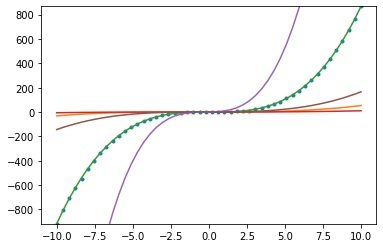

In [10]:
plt.plot(X[:, 1], sample["mixture"], ".")
for coefficients in sample["coefficients"]:
    plt.plot(X[:, 1], np.matmul(X, coefficients))
plt.ylim([np.min(sample["mixture"]), np.max(sample["mixture"])])